# Avaliações de Filmes do MovieLens

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns

## Formato dos dados

In [2]:
# Relação entre id do filme e seu título
filmes = pd.read_csv("Dados/large-2019/movies.csv")

# Foi verificado, que o

# Conv para string
filmes['title'] = filmes['title'].astype('string')

# Removendo espaços nas extremidades
filmes['title'] = filmes['title'].str.strip()

# Convertendo coluna de ano para inteiro
filmes['ano'] = filmes['title'].str.slice(-5,-1)#.astype(int)

# Estes não tem ano informado, e serão removidos desse DataFrame
selec = (filmes['ano'].str.isnumeric())
selec2 = filmes.set_index('movieId')['ano'].str.isnumeric()
filmes = filmes.drop(index = selec[selec == False].index)

# Observamos também um filme com ano "6", vamos remover manualmente
filmes = filmes.drop(index = 40372)

# Convertendo pra inteiro
filmes['ano'] = filmes['ano'].astype(int)

# Imprimindo
filmes.sort_values('ano')

,movieId,title,genres,ano
35536,148054,Passage de Venus (1874),Documentary,1874
35533,148048,Sallie Gardner at a Gallop (1878),(no genres listed),1878
59938,202045,Athlete Swinging a Pick (1880),Documentary,1880
43771,166800,Buffalo Running (1883),(no genres listed),1883
35529,148040,Man Walking Around a Corner (1887),(no genres listed),1887
...,...,...,...,...
60989,204654,Chase (2019),Action|Thriller,2019
60985,204644,Mikhael (2019),Action|Children|Thriller,2019
60981,204636,Crystal's Shadow (2019),Sci-Fi,2019
58516,198781,Uri: The Surgical Strike (2019),Action|Drama,2019


In [3]:
# Lendo dados, renomeando colunas e exibindo primeiros itens
notas = pd.read_csv("Dados/large-2019/ratings.csv")
notas.columns = ["user", "movieId", "nota", "tempo"]
notas.head()

,user,movieId,nota,tempo
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
# Obtendo lista de todos os valores únicos de avaliação registrados
aval_unique = list(notas['nota'].unique())
aval_unique.sort()

In [5]:
print("Os dados contém {} avaliações, cada qual com {} variáveis associadas.".format(notas.shape[0], notas.shape[1]))

print("\nEssas variáveis são: identificação do usuário, identificação do filme, avaliação do filme pelo usuário, e registro do momento em que foi avaliado.")

print("\nOs valores posíveis para se avaliar os filmes são:\n\n",aval_unique)

Os dados contém 25000095 avaliações, cada qual com 4 variáveis associadas.

Essas variáveis são: identificação do usuário, identificação do filme, avaliação do filme pelo usuário, e registro do momento em que foi avaliado.

Os valores posíveis para se avaliar os filmes são:

 [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


### Estatísticas gerais

In [6]:
print("A média de todas as avaliações, independente do filme, foi {:.3f}".format(notas[ 'nota'].mean()))
print("E a mediana dos mesmos dados, foi", notas['nota'].median())

A média de todas as avaliações, independente do filme, foi 3.534
E a mediana dos mesmos dados, foi 3.5


# Visualização da Frequência de cada Avaliação

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequência')

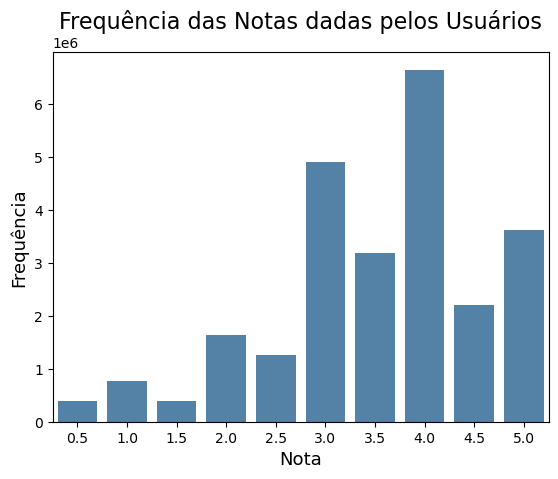

In [8]:
# Obtendo a frequência absoluta e plotando em um gráfico de barras
freq_abs = notas['nota'].value_counts()

# Plotando
fig, ax = plt.subplots()
ax = sns.barplot(x = freq_abs.index, y = freq_abs.values, color = 'steelblue')

# Nomes no gráfico
ax.set_title("Frequência das Notas dadas pelos Usuários", fontsize = 16)
ax.set_xlabel('Nota', fontsize = 13)
ax.set_ylabel('Frequência', fontsize = 13)

In [9]:
freq_perc = notas['nota'].value_counts(normalize = True) * 100
freq_perc

4.0    26.559091
3.0    19.587638
5.0    14.449841
3.5    12.709224
4.5     8.802123
2.0     6.563447
2.5     5.051169
1.0     3.107248
1.5     1.597954
0.5     1.572266
Name: nota, dtype: float64

In [10]:
print("A frequência de notas menores que 2.0 é {:.2f} %".format(freq_perc[0.5] + freq_perc[1.0] + freq_perc[1.5]))

A frequência de notas menores que 2.0 é 6.28 %


## Conclusões do Gráfico de Barras

Pela visualização, podemos notar, que 4.0 foi a nota mais frequentemente dada pelos usuários, e em segundo lugar, a avaliação 3.0. Observamos que poucas avaliações abaixo de 2.0 foram dadas. 

Olhando a relação das frequências relativa, vemos também que apesar de 5.0 ser a nota máxima que um filme pode receber, ela foi a 3ª avaliação mais frequente, correspondendo à 13.1% de todas as avaliações.

Parece haver um preferência por notas inteiras. Vamos avaliar isso melhor a seguir.

## Inteiras vs. Fracionárias

Text(0.5, 1.0, 'Notas Fracionárias')

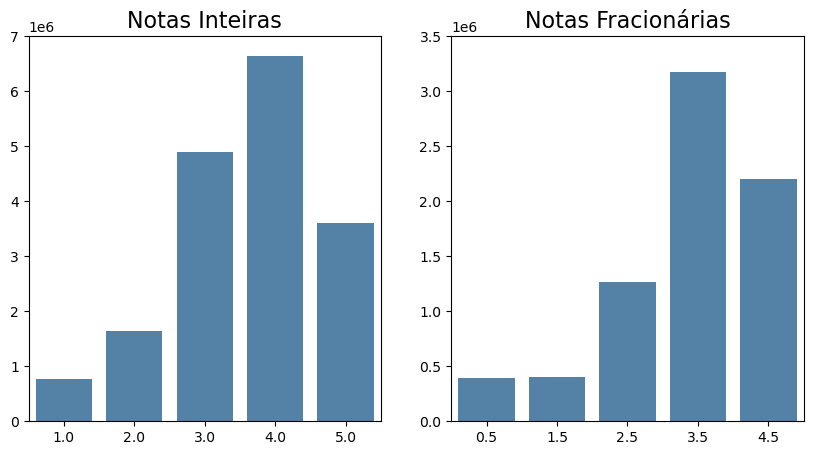

In [11]:
# Figura e eixos
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

# Limites dos eixos
ax1.set_ylim(0, 7e6)
ax2.set_ylim(0, 3.5e6)

# Plot inteiros
sns.barplot(x = freq_abs.index, y = freq_abs.values, color = 'steelblue', order = [1.0, 2.0, 3.0, 4.0, 5.0], ax = ax1)

# Plot fracionários
sns.barplot(x = freq_abs.index, y = freq_abs.values, color = 'steelblue', order = [0.5, 1.5, 2.5, 3.5, 4.5], ax = ax2)

# Títulos
ax1.set_title("Notas Inteiras", fontsize = 16)
ax2.set_title("Notas Fracionárias", fontsize = 16)

Ao plotarmos lado a lado, em escalas diferentes, as frequências das notas inteiras e fracionárias, vemos que as duas tem um comportamento muito semelhante. 

Mas ao voltarmos nossas atenções às escalas, vemos que apesar do comportamento ser semelhante, as notas inteiras são aproximadamente duas vezes mais frequentes que as fracionárias.

Vamos calcular a frequência de uma em relação a outra:

In [12]:
frac = freq_perc[0.5] + freq_perc[1.5] + freq_perc[2.5] + freq_perc[3.5] + freq_perc[4.5]
freq_frac_total = frac / 100
freq_int_frac = (100 - frac) / frac

print("A notas fracionárias são {:.1f} % de todas as notas, de forma que as notas inteiras são {:.1f} vezes mais frequentes que as fracionárias.".format(freq_frac_total * 100, freq_int_frac))

A notas fracionárias são 29.7 % de todas as notas, de forma que as notas inteiras são 2.4 vezes mais frequentes que as fracionárias.


# Avaliações por filme

## Informações do filme 1

In [13]:
# Vizualização todas as avalizações dadas ao filme 1
notas.query("movieId==1").head(7)

,user,movieId,nota,tempo
70,2,1,3.5,1141415820
254,3,1,4.0,1439472215
910,4,1,3.0,1573944252
1152,5,1,4.0,858625949
1304,8,1,4.0,890492517
1637,10,1,3.5,1227571347
1714,12,1,4.0,1167582601


# Média dos Filmes

Calculamos aqui, a média das notas de cada filme dos dados

In [14]:
# Agrupando os dados por filmes (todas as avaliações de cada filme em um grupo)
grupo_notas = notas.groupby("movieId")

In [15]:
# Calculando a média de todos os filmes
media_filmes = grupo_notas.mean()['nota']
media_filmes.head(7)

movieId
1    3.893708
2    3.251527
3    3.142028
4    2.853547
5    3.058434
6    3.854909
7    3.363666
Name: nota, dtype: float64

### Estatísticas dos dados

In [16]:
media_filmes.describe()

count    59047.000000
mean         3.071374
std          0.739840
min          0.500000
25%          2.687500
50%          3.150000
75%          3.500000
max          5.000000
Name: nota, dtype: float64

# Plotando os dados de média por filme

## Boxplot

<Axes: xlabel='nota'>

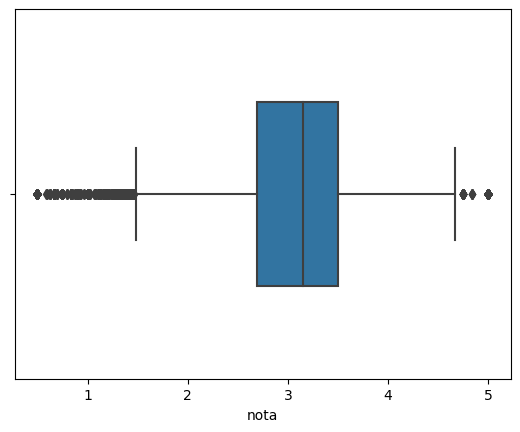

In [17]:
sns.boxplot(x = media_filmes, width = 0.5)

### Conclusão boxplot

### ----- Corrigir valores para os novos dados

Pela visualização de boxplot gerada sobre as médias de avaliações de filmes, podemos ver que pela pequena distância entre o primeiro e terceiro quartil, que as notas estão muito concentradas entre aproximadamente 3 e 4. O quarto maior está aproximadamente entre 4 e 5, enquanto o quarto maior, está espalhado entre 0.5 e 3, um intervalo bem maior quando comparado ao resto dos dados. Isso indica uma assimetria à esquerda, onde a os dados têm mais volume nos valores mais altos, e uma calda esticada nos valores mais baixos.

E de fato, olhando o cálculo dos quartis, esses valores estão concentrados entre 2.80 e 3.91, 

## Histograma

<Axes: xlabel='nota', ylabel='Count'>

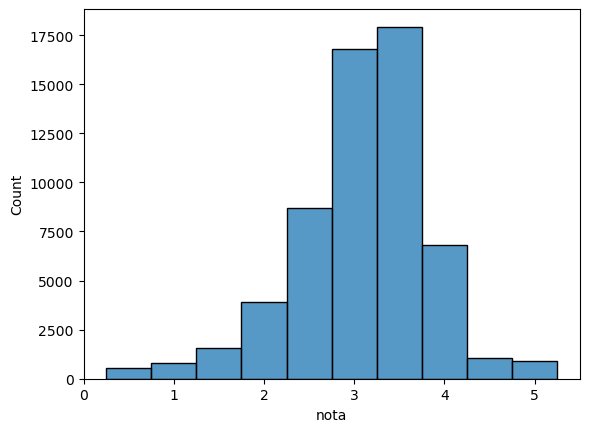

In [18]:
sns.histplot(media_filmes, bins = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25] )

Observamos que poucos filmes recebem notas acima de 4.25, apesar de muitas notas 5.0 serem dadas. Vamos calcular quantos são.

In [19]:
freq__notas_altas = (media_filmes[ media_filmes > 4.25 ].shape[0] / media_filmes.shape[0]) * 100

print("A frequência de filmes nos dados, com nota média maior que 4.25, é {:.2f} %".format(freq__notas_altas))

A frequência de filmes nos dados, com nota média maior que 4.25, é 2.81 %


Vamos investigar isso mais a fundo:

## Filmes com maior frequencia relativa de nota 5.0

In [20]:
### Removendo filmes com menos de 50 votos

# Quais são?
filmes_pop = notas['movieId'].value_counts()[ notas['movieId'].value_counts() >= 500 ].index

# Criando DataFrame
vote_counts = notas['movieId'].value_counts().sort_index()

df = pd.DataFrame()

df.index = media_filmes.index
df['nota_media'] = media_filmes
df['qtde_votos'] = vote_counts

# Filtrando filmes não populares
selec = df.index.isin(filmes_pop)
df_pop0 = df[selec]

In [21]:
# Filtrando
selec = notas['movieId'].isin(filmes_pop)
notas_pop = notas[selec]

# Frequência relativa de 5.0
freq_relat_5 = notas_pop.query('nota == 5.0')['movieId'].value_counts() / notas_pop['movieId'].value_counts()
freq_relat_5 = freq_relat_5.fillna(0)
freq_relat_5.name = 'freq_relat_5'

# Inserindo no DataFrame
df_pop1 = pd.DataFrame()
df_pop1 = pd.concat([df_pop0, freq_relat_5], axis = 1)
df_pop1.index.name = 'movieId'
df_pop1.sort_values('freq_relat_5', ascending = False)

,nota_media,qtde_votos,freq_relat_5
movieId,,,
171011,4.483096,1124,0.498221
318,4.413576,81482,0.485420
159817,4.464797,1747,0.476817
858,4.324336,52498,0.465122
670,4.111486,740,0.460811
...,...,...,...
5609,2.016224,678,0.005900
7005,2.389273,578,0.005190
2816,1.843924,897,0.004459


Com essa análise, concluímos, que mesmo os filmes mais bem avaliados, nunca têm mais da metade de suas avaliações como notas 5.0. Então, mesmo que essa avaliação seja muito feita, não significa que ela representa maior parte das avaliações dos filmes. Portanto isso não garante que haverão muitos filmes com nota próxima de 5.0

## Scatterplot (Nota x Quantidade de Notas)

Text(0, 0.5, 'Quantidade de Votos')

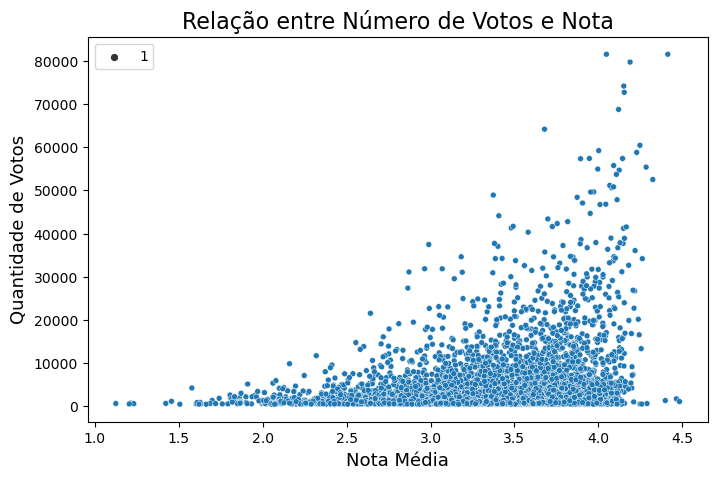

In [22]:
# Figura e eixos
fig, ax = plt.subplots(figsize = (8,5))

sns.scatterplot(data = df.query('qtde_votos > 500 '), x = 'nota_media', y = 'qtde_votos', size = 1, ax = ax)

# Nomes no gráfico
ax.set_title("Relação entre Número de Votos e Nota", fontsize = 16)
ax.set_xlabel('Nota Média', fontsize = 13)
ax.set_ylabel('Quantidade de Votos', fontsize = 13)

### Tendência de nota maior, conforme maior número de votos

Observamos, que quanto maior a quantidade de votos um filme tem, é mais comum que o filme seja bem avaliado. Isso provavelmente vem do fato, que filmes de alta qualidade, tendem a se tornarem mais populares, de forma que mais pessoas os assistam e os avaliem.

## Filmes perto do vértice

In [23]:
''' Como removemos alguns filmes do dataframe "filmes", ao juntarmos ele com o 
    dataframe filmes_pop2, precisamos verificar e remover qua isquer filmes deste 
    caso, para não ficarmos com dados incompletos '''

# Armazenando DataFrame de nomes e ano, apenas de filmes pop
selec = filmes['movieId'].isin(filmes_pop)
nome_ano_pop = filmes[selec].set_index('movieId')[['title', 'ano']]

# Juntando avaliações com nomes e anos (apenas os que possuem tal)
selec = df_pop1.index.isin(nome_ano_pop.index)
df_pop2 = pd.concat([ df_pop1[selec], nome_ano_pop], axis = 1)

# Coluna de produto (num de votos * nota média)
df_pop2['produto'] = df_pop2['qtde_votos'] * df_pop2['nota_media']

# Exibir ordenando pelo produto
df_pop2.sort_values('produto', ascending = False).head(6)

,nota_media,qtde_votos,freq_relat_5,title,ano,produto
movieId,,,,,,
318,4.413576,81482,0.485420,"Shawshank Redemption, The (1994)",1994,359627.0
296,4.188912,79672,0.403768,Pulp Fiction (1994),1994,333739.0
356,4.048011,81491,0.318047,Forrest Gump (1994),1994,329876.5
593,4.151342,74127,0.334574,"Silence of the Lambs, The (1991)",1991,307726.5
2571,4.154099,72674,0.350634,"Matrix, The (1999)",1999,301895.0
260,4.120189,68717,0.375511,Star Wars: Episode IV - A New Hope (1977),1977,283127.0


## Limite de nota com mais de 500 votos

In [24]:
df_pop2.query("nota_media > 4.2").sort_values('nota_media', ascending = False)

,nota_media,qtde_votos,freq_relat_5,title,ano,produto
movieId,,,,,,
171011,4.483096,1124,0.498221,Planet Earth II (2016),2016,5039.0
159817,4.464797,1747,0.476817,Planet Earth (2006),2006,7800.0
318,4.413576,81482,0.485420,"Shawshank Redemption, The (1994)",1994,359627.0
170705,4.398599,1356,0.426254,Band of Brothers (2001),2001,5964.5
858,4.324336,52498,0.465122,"Godfather, The (1972)",1972,227019.0
179135,4.289833,659,0.423369,Blue Planet II (2017),2017,2827.0
50,4.284353,55366,0.389860,"Usual Suspects, The (1995)",1995,237207.5
1221,4.261759,34188,0.415409,"Godfather: Part II, The (1974)",1974,145701.0
163809,4.258242,546,0.358974,Over the Garden Wall (2013),2013,2325.0


Ao mesmo tempo, quando um filme alcança uma quantidade maior de votos, é muito difícil que ele ultrapasse muito o limite de 4.2 na avaliação. Isso provelmente vem do fato, de que um filme não muito popular, pode atingir um nicho de pessoas particularmente interessadas naquele tipo de filme, e a maioria delas avaliar muito bem o filme. Mas ao atingir um público razoável, é muito difícil que o filme vá agradar a todos, impedindo assim, que um filme popular, atinja notas muito altas.

Observamos como exceção, que Planet Earth, e Planet Earth II, ultrapassaram estes suposto limite. Podemos supor, que talvez, seja mais difícil agradar a maioria quando o foco é artístico, já que isso é algo bem subjetivo. Já quando se trata de algo informativo, talvez não seja tão difícil assim agradar um grande público. Podemos investigar isso mais a fundo.

## *****Investigar se documentários se comportam de forma diferente de filmes

## Dispersão de Notas por Filmes

In [25]:
#####
pd.set_option('display.max_rows', 30)
#####

# Dados usados
notas2 = notas.drop(columns=['tempo','user']).copy()

selec = notas2['movieId'].isin(filmes_pop)
notas2 = notas2[selec].copy()

# Agrupando por filme
grupo_notas = notas2.groupby('movieId')

# Calculando std
std_notas = grupo_notas.std()

# Renomeando coluna
std_notas.columns = ['std_nota']

# Adicionando ao DataFrame 
df_pop3 = pd.concat([df_pop2, std_notas], axis = 1)

# Buscando filmes  ################# EXPLORAR ########################
df_pop3.query('nota_media < 3.0 ').sort_values('std_nota', ascending = True)

,nota_media,qtde_votos,freq_relat_5,title,ano,produto,std_nota
movieId,,,,,,,
2472,2.949000,500.0,0.012000,Tough Guys (1986),1986.0,1474.5,0.796975
4354,2.998084,522.0,0.015326,Unlawful Entry (1992),1992.0,1565.0,0.800070
6078,2.955745,644.0,0.018634,Firefox (1982),1982.0,1903.5,0.820602
7102,2.893671,790.0,0.010127,Dragnet (1987),1987.0,2286.0,0.837242
4775,1.125561,669.0,0.007474,Glitter (2001),2001.0,753.0,0.844100
...,...,...,...,...,...,...,...
91104,2.328586,1896.0,0.072257,"Twilight Saga: Breaking Dawn - Part 1, The (2011)",2011.0,4415.0,1.442347
27899,2.776786,616.0,0.095779,What the #$*! Do We Know!? (a.k.a. What the Bl...,2004.0,1710.5,1.445519
98203,2.524219,1569.0,0.085405,"Twilight Saga: Breaking Dawn - Part 2, The (2012)",2012.0,3960.5,1.456004


# Relações com ano

Existe uma relação clara entre nota média e ano?

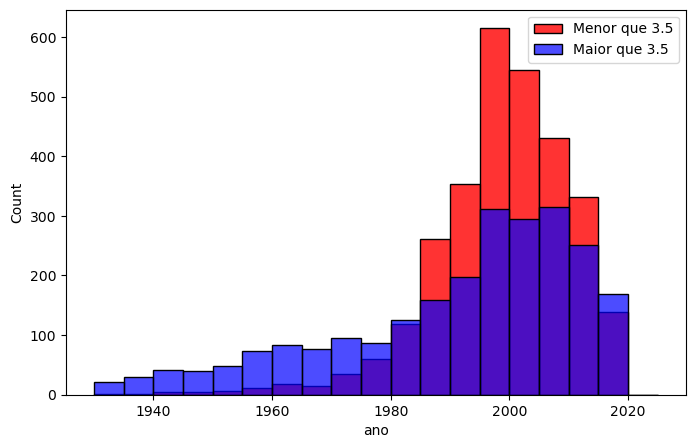

In [26]:
fig, ax = plt.subplots(figsize = (8,5))

sns.histplot(data = df_pop3.query('nota_media < 3.5'), x = 'ano', 
             bins = [ (1930 + 5*i) for i in range(20) ], 
             color = 'r', alpha = 0.8, label = 'Menor que 3.5',
             ax = ax )

sns.histplot(data = df_pop3.query('nota_media >= 3.5'), x = 'ano', 
             bins = [ (1930 + 5*i) for i in range(20) ], 
             color = 'b', alpha = 0.7, label = 'Maior que 3.5', 
             ax = ax )

plt.legend()

Podemos observar que em alguns anos, houve mais filmes bem avaliados do que em outros anos. Principalmentea antes de 1970, que quase não há filmes mal avaliados.

Mas vamos melhorar essa visualiação:

In [58]:
intervalos = [ round(df_pop2['ano'].min(), -1) + 5*i for i in range(25)]

filmes_por_epoca = []
labels = []
perc = {}
num = []

for i in range(24):
    
    filtro1 = 'ano >= '+str(intervalos[i])
    filtro2 = 'ano < ' +str(intervalos[i+1])
    
    filmes_por_epoca.append(df_pop2.query(filtro1).query(filtro2))
    
    labels.append(str(intervalos[i])) #+'-'+str(intervalos[i+1]))
    
for i in range(24):
    
    if filmes_por_epoca[i].shape[0] == 0:
        perc[labels[i]] = 0
        
        num.append(0)
        
    else: 
        perc[labels[i]] = round( ( (filmes_por_epoca[i].query('nota_media > 3.5').shape[0] 
                                        / filmes_por_epoca[i].shape[0]) * 100), 2)
        
        num.append(filmes_por_epoca[i].shape[0]) #+' filmes')

## --- Será que os dados dos quinquênios ficaram corretos?

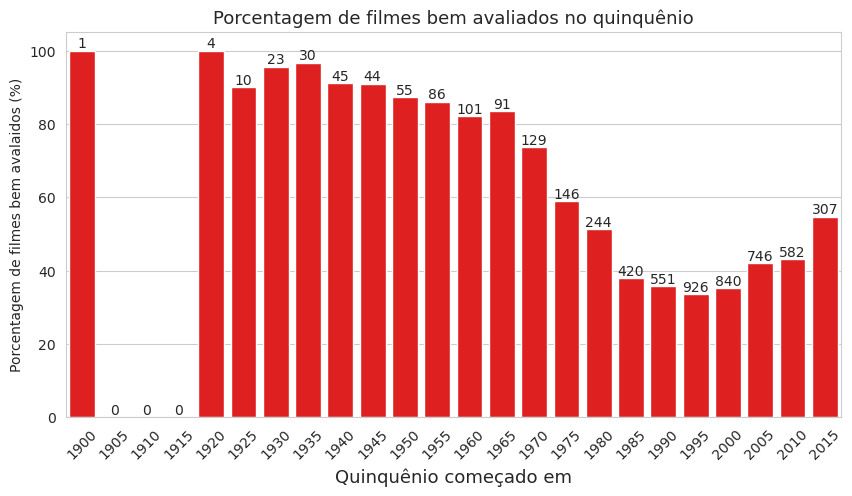

In [59]:
fig, ax = plt.subplots(figsize = (10,5))

sns.set_style('whitegrid')
sns.barplot(x = list(perc.keys()), y = list(perc.values()), color = 'r')

plt.xticks(rotation=45)

# Nomes no gráfico
ax.set_title("Porcentagem de filmes bem avaliados no quinquênio", fontsize = 13)
ax.set_ylabel('Porcentagem de filmes bem avalaidos (%)', fontsize = 10)
ax.set_xlabel('Quinquênio começado em', fontsize = 13)

a = ax.bar_label(ax.containers[0], fmt='%.1f', labels = num)

Agora podemos observar claramente, que para cada quinquênio antes de 1970 que se tem registro, mais de 80% dos filmes eram bem avaliado, e que depois disso, essa poercentagem vai diminuindo. Ao mesmo tempo, a quantidade de filmes avalaidos tende a aumentar.

É essencial considerar a forma como os dados foram coletados: esse dataset é do site MovieLens, que foi criado apenas em 1997, logo, é natural que haja mais avaliações após esse ano, ou também um pouco antes dessa data, já que é natural que as pessoas vejam mais filmes contemporâneos, e os avaliem, do que o contrário.

De forma semelhante, é natural que filmes antigos de qualidade inferior, ou mediana, sejam esquecidos, e que as pessoas só voltem para assistir filmes de longa data, se foram particularmente aclamados à sua época, ou caso tenham marcarado algum momento de sua vida, e por isso seja nostálgico. Esses dois fatores, favorecem que a maior parte dos filmes antigos que chegaram a ser avaliados, sejam filmes avaliados com qualidade superior.

## ---------- Cruzar quantidade de avaliações em filmes de cada quinquênio

<Axes: xlabel='ano', ylabel='nota_media'>

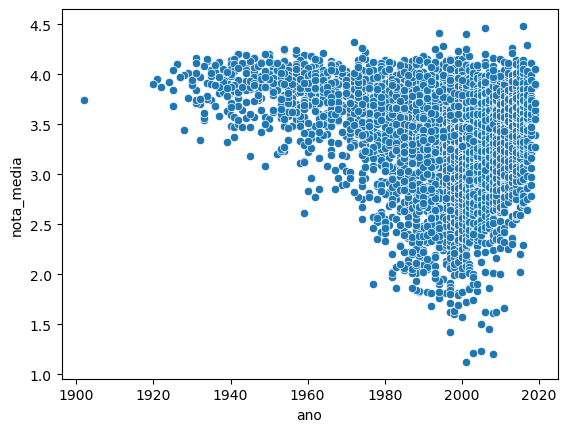

In [29]:
### NOTA MÉDIA x ANO
sns.scatterplot(data = df_pop3, x = 'ano', y = 'nota_media')

In [30]:
#pd.set_option('display.max_rows', None)

<Axes: xlabel='ano', ylabel='produto'>

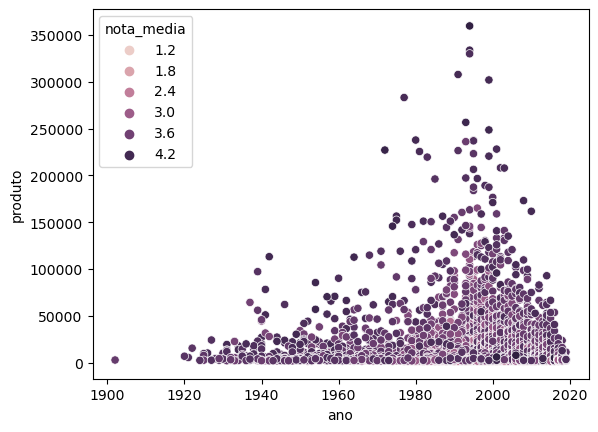

In [32]:
sns.scatterplot(data = df_pop3, x = 'ano', y = 'produto',  hue = 'nota_media' )

In [65]:
### BUSCA NOTAS

notas.query('movieId == 1276')#.sort_values('nota')['nota'].value_counts().sort_index()

,user,movieId,nota,tempo
3686,20,1276,5.0,1061998035
8902,70,1276,3.5,1255205963
9346,72,1276,4.0,981151400
13198,99,1276,4.0,1511720527
13777,107,1276,3.0,1146426340
...,...,...,...,...
24986250,162486,1276,4.5,1351370507
24989757,162508,1276,1.0,1365193219
24992526,162516,1276,3.5,1175652271
24998236,162529,1276,4.0,888182835


In [34]:
## BUSCA FILMES

filmes.query('movieId == 5888')

,movieId,title,genres,ano
5776,5888,Brother (Brat) (1997),Crime|Drama,1997
